# Merge two independent verification datasets to final ground truth

In [1]:
#Load all needed libraries
import pandas as pd
import time 
import numpy as np
import seaborn as sebrn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as atlas
import warnings
from functools import reduce  

In [2]:
warnings.filterwarnings("ignore")

#osm/wikidata:etymology
verif_etym = pd.read_csv('data/out_verif_etym.csv', encoding='UTF-8-SIG', sep=';')

#ZH Erläuterungen
verif_zh = pd.read_csv('data/out_verif_zh.csv', encoding='UTF-8-SIG', sep=';')

#Predictions
out_mapping = pd.read_csv('../Modeling/out_mapping.csv', encoding='UTF-8-SIG', sep=';')

In [3]:
verif_etym = verif_etym.drop(['Unnamed: 0'], axis=1)
verif_zh = verif_zh.drop(['Unnamed: 0.1'], axis=1)

In [4]:
verif_zh

,Unnamed: 0,str_name,STR_ESID,snb_erlaeuterung,STN_LABEL,instance
0,0,Brunngasse,10096235,Im Jahr 1242 erstmals erwähnte Bezeichnung für...,Brunngasse,Siedlung
1,1,Poststrasse,10103841,In den Jahren 1835-1838 angelegte neue Hauptve...,Poststrasse,Siedlung
2,2,Zurlindenstrasse,10108763,Benannt nach der 1396 erstmals bezeugten und i...,Zurlindenstrasse,Person
3,3,Talstrasse,10069751,Zweite Längsstrasse im Talackerquartier. Der v...,Talstrasse,Natur
4,4,Grabenweg,10141751,Weg entlang eines Bach- oder Entwässerungsgrab...,Grabenweg,Natur
...,...,...,...,...,...,...
276,276,Altweg,10075512,Verkürzte Form des Flurnamens «im alten Weg» (...,Altweg,Andere
277,277,Baumschulweg,10194291,Weg zur Baumschule oberhalb des Schiessplatzes...,Baumschulweg,Siedlung
278,278,Eichacker,10072830,Flurname: Acker in der Nähe einer Eiche oder e...,Eichacker,Lebewesen
279,279,Geerenweg,10030931,"Flurname «Geeren», d. h. in einem spitzen Wink...",Geerenweg,Siedlung


## Create confusion matrix

In [5]:
confusion_all = reduce(lambda left, right:     # Merge three pandas DataFrames
                     pd.merge(left , right,
                              on = ["STR_ESID"],
                              how = "outer"),
                     [out_mapping, verif_etym, verif_zh])

In [6]:
confusion_all = confusion_all.drop(['Unnamed: 0_x', 'COM_FOSNR','COM_NAME' ,'COM_CANTON','STR_OFFICIAL',
                   'STR_EASTING','STR_NORTHING','STN_LABEL_NO_BI', 'STN_LABEL_NO_TERMS','STR_TERMS','STR_PREPS'
                                    ,'Unnamed: 0_y'], axis=1)

In [7]:
confusion_all.columns

Index(['STR_ESID', 'SPACY_DE', 'SPACY_DE_LEMMA', 'SPACY_DE_ENT', 'SPACY_FR',
       'SPACY_FR_LEMMA', 'SPACY_FR_ENT', 'STN_LABEL_x', 'DIC_Lebewesen',
       'DIC_Ortschaft', 'DIC_Berufe', 'DIC_Gewässer', 'DIC_Berg',
       'DIC_Siedlung', 'DIC_Religion', 'DIC_Natur', 'wikiQLabel', 'wikiQ',
       'sex_x', 'birth', 'death', 'placebirth', 'placedeath', 'image',
       'classif', 'qid', 'instanceLabel', 'dateBirth', 'pic', 'sex_y',
       'instance_x', 'STN_LABEL_y', 'STN_LABEL_FINAL', 'str_name',
       'snb_erlaeuterung', 'STN_LABEL', 'instance_y'],
      dtype='object')

In [8]:
confusion_all = confusion_all.assign(instance=confusion_all['instance_x'].mask(confusion_all['instance_x'].isna(), 
                                                                               confusion_all['instance_y']))

In [9]:
confusion_all = confusion_all.loc[confusion_all.instance.notnull()]

In [10]:
confusion = confusion_all.drop_duplicates(subset=['STN_LABEL_x'])

In [11]:
confusion.head()

,STR_ESID,SPACY_DE,SPACY_DE_LEMMA,SPACY_DE_ENT,SPACY_FR,SPACY_FR_LEMMA,SPACY_FR_ENT,STN_LABEL_x,DIC_Lebewesen,DIC_Ortschaft,...,pic,sex_y,instance_x,STN_LABEL_y,STN_LABEL_FINAL,str_name,snb_erlaeuterung,STN_LABEL,instance_y,instance
4,10096235,Brunn,Brunn,NaN,Brunn,Brunn,NaN,Brunngasse,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Brunngasse,Im Jahr 1242 erstmals erwähnte Bezeichnung für...,Brunngasse,Siedlung,Siedlung
6,10103841,Post,Post,NaN,Post,Post,NaN,Poststrasse,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Poststrasse,In den Jahren 1835-1838 angelegte neue Hauptve...,Poststrasse,Siedlung,Siedlung
8,10108763,Zurlinden,zurlinden,NaN,Zurlinden,Zurlinden,NaN,Zurlindenstrasse,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Zurlindenstrasse,Benannt nach der 1396 erstmals bezeugten und i...,Zurlindenstrasse,Person,Person
40,10069751,Tal,Tal,NaN,Tal,Tal,NaN,Talstrasse,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Talstrasse,Zweite Längsstrasse im Talackerquartier. Der v...,Talstrasse,Natur,Natur
43,10141751,Graben,Graben,NaN,Graben,Graben,NaN,Grabenweg,NaN,Graben,...,NaN,NaN,NaN,NaN,NaN,Grabenweg,Weg entlang eines Bach- oder Entwässerungsgrab...,Grabenweg,Natur,Natur


In [12]:
most_common = confusion.groupby("classif").count()
most_common

,STR_ESID,SPACY_DE,SPACY_DE_LEMMA,SPACY_DE_ENT,SPACY_FR,SPACY_FR_LEMMA,SPACY_FR_ENT,STN_LABEL_x,DIC_Lebewesen,DIC_Ortschaft,...,pic,sex_y,instance_x,STN_LABEL_y,STN_LABEL_FINAL,str_name,snb_erlaeuterung,STN_LABEL,instance_y,instance
classif,,,,,,,,,,,,,,,,,,,,,
Andere,445,444,444,10,444,444,25,444,0,0,...,353,278,353,353,353,92,92,92,92,445
Berg,64,64,64,7,64,64,16,64,4,21,...,43,17,43,43,43,21,21,21,21,64
Beruf,20,20,20,0,20,20,4,20,0,1,...,17,11,17,17,17,3,3,3,3,20
Gewässer,16,16,16,5,16,16,6,16,0,2,...,8,2,8,8,8,8,8,8,8,16
Lebewesen,99,99,99,4,99,99,12,99,99,15,...,62,17,62,62,62,37,37,37,37,99
Natur,78,78,78,7,78,78,11,78,4,22,...,28,22,28,28,28,50,50,50,50,78
Ortschaft,69,69,69,4,69,69,7,69,0,69,...,54,20,54,54,54,15,15,15,15,69
Person,333,333,333,194,333,333,267,333,0,29,...,324,303,324,324,324,9,9,9,9,333
Religion,21,21,21,4,21,21,6,21,0,6,...,14,8,14,14,14,7,7,7,7,21


In [13]:
confusion.classif.unique()

array(['Andere', 'Siedlung', 'Natur', 'Lebewesen', 'Beruf', 'Berg',
       'Religion', 'Ortschaft', 'Gewässer', 'Person'], dtype=object)

In [14]:
confusion.instance.unique()

array(['Siedlung', 'Person', 'Natur', 'Lebewesen', 'Andere', 'Religion',
       'Ortschaft', 'Beruf', 'Gewässer', 'Berg'], dtype=object)

In [15]:
confusion["classif"] = confusion["classif"].fillna('Andere')
confusion["instance"] = confusion["instance"].fillna('Andere')

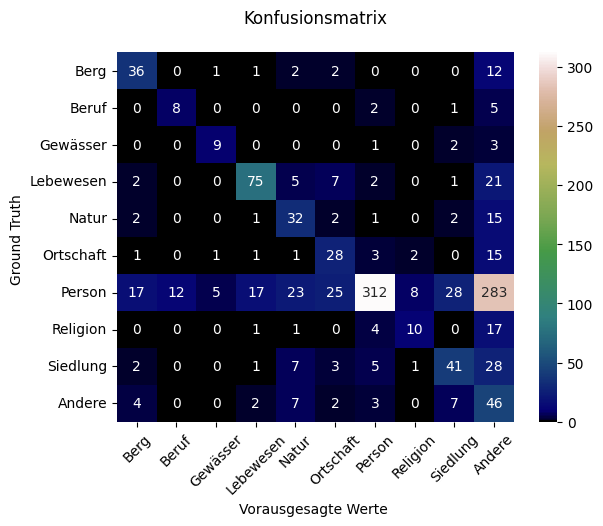

In [21]:
labels = [ 'Berg', 'Beruf', 'Gewässer', 'Lebewesen', 'Natur', 'Ortschaft', 'Person',
          'Religion','Siedlung',   'Andere']

y_true = confusion.instance
y_pred = confusion.classif
conf_matrix = (confusion_matrix(y_true, y_pred, labels= labels))

# Using Seaborn heatmap to create the plot
fx = sebrn.heatmap(conf_matrix, annot=True, cmap='gist_earth', fmt='')

# labels the title and x, y axis of plot
fx.set_title('Konfusionsmatrix\n');
fx.set_xlabel('Vorausgesagte Werte ')
fx.set_ylabel('Ground Truth ');
fx.set_xticklabels(labels, rotation=45)
fx.set_yticklabels(labels, rotation=0)

# labels the boxes


atlas.show()

In [17]:
from sklearn.metrics import classification_report

labels = [ 'Berg', 'Beruf', 'Gewässer', 'Lebewesen', 'Natur', 'Ortschaft', 'Person',
          'Religion','Siedlung',   'Andere']

print(classification_report(confusion.instance, confusion.classif,  labels=labels))

              precision    recall  f1-score   support

        Berg       0.56      0.67      0.61        54
       Beruf       0.40      0.50      0.44        16
    Gewässer       0.56      0.60      0.58        15
   Lebewesen       0.76      0.66      0.71       113
       Natur       0.41      0.58      0.48        55
   Ortschaft       0.41      0.54      0.46        52
      Person       0.94      0.43      0.59       730
    Religion       0.48      0.30      0.37        33
    Siedlung       0.50      0.47      0.48        88
      Andere       0.10      0.65      0.18        71

    accuracy                           0.49      1227
   macro avg       0.51      0.54      0.49      1227
weighted avg       0.75      0.49      0.55      1227



In [18]:
confusion_all.to_csv(r'C:\CAS_Arbeit\cassda-zertifikatsarbeit\Evaluation\data\out_verif.csv', encoding='UTF-8-SIG', sep=';')